# Case study 3

A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.
2. Build a regression model to predict the profit from the given data and 
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the data

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Indicates that the data have 205 entries from 0 to 204 with no null values.

In [6]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

<AxesSubplot:>

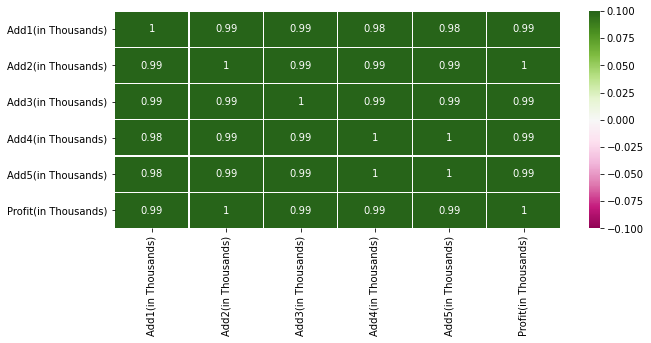

In [7]:
#to check whether there is any relationship between the amount spent for advertising 
#through five different companies and profit generated
co_matrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(co_matrix,vmin=-.1,vmax=.1,annot=True,linewidth=0.2,cmap='PiYG')

Insights: As inferred from the heat map, the correlation factor between profit and all the adds are between 0.98 to 1 which indicates a strong positive correlation.And Also Add4 and Add 5 are highly correlated with each other as the correlation value is 1.

In [8]:
data1 = data.drop(['Add5(in Thousands)','Date'],axis=1)

In [9]:
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [10]:
y = data1['Profit(in Thousands)']
X = data1.drop(['Profit(in Thousands)'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [12]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [13]:
model = lr.fit(X_train,y_train)

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.48613686631982095


Insights: As inferred from the above mean squared error is 0.486 which is less than 0.5. Our model has less error and can be used for predictions.

In [16]:
make_pred=[[290,312,309,298]]
model.predict(make_pred).item()

5801.68051325114

Insights: The profit generated by the company will be 5801.68 is the wish to spend the given amount in advertisement.